# Reglas de Asociación: arulesViz R-package

### Santander Meteorology Group
#### Mikel N. Legasa (legasam@unican.es)


Las librerías [arulesViz](https://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf) y [arules](https://cran.r-project.org/web/packages/arules/arules.pdf), desarrolladas por [IDA@SMU](http://lyle.smu.edu/IDA/arules/), consideran diferentes técnicas para la obtención y visualización de reglas de asociación a partir de un conjunto de datos, así como herramientas para explorar dichas reglas.

El objetivo de la presente tarea es familiarizarnos con el manejo de estas librerías en el marco de R, así como presentar este tipo de algoritmos de aprendizaje, con diversas aplicaciones y que nos servirán además de introducción a los modelos gráficos probabilísticos, que analizaremos en profundidad en la asignatura Machine Learning II.

## Instalación de la librería arulesViz

Dado que la librería está incluida en el CRAN ([The Comprehensive R Archive Network](https://cran.r-project.org/)), el respositorio central de librerías de R, la instalación puede realizarse a través del comando `install.package`. En caso de tener ya instalado el paquete no hace falta instalarlo de nuevo y basta con activarlo con el comando `library`.

In [1]:
# If we have not installed the "arulesViz" library we should do it:
# install.packages("arulesViz")
library(arulesViz)

Loading required package: arules

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid



Nota que la instalación de la libería requiere de la instalación de sus dependencias. En particular de la librería `arules`, la cual se activa al activar `arulesViz`.

## Ejemplo realizado en clase:

Inicialmente consideraremos el ejemplo realizado en clase para familiarizarnos con los comandos y sus opciones para luego aplicarlo en un problema más general. Para ello, primero definiremos la tabla de transacciones del problema:

In [2]:
table <- list(c("p","l","O","b"), c("p","l"), c("p","O","c"), c("p","l","O","c"))
transactions <- as(table, "transactions")  #simplemente convierte a la clase transacciones
inspect(transactions)

    items    
[1] {b,l,O,p}
[2] {l,p}    
[3] {c,O,p}  
[4] {c,l,O,p}


Podemos ver el soporte, absoluto o relativo: de cada item:

b c l O p 
1 2 3 3 4

b    c    l    O    p 
0.25 0.50 0.75 0.75 1.00

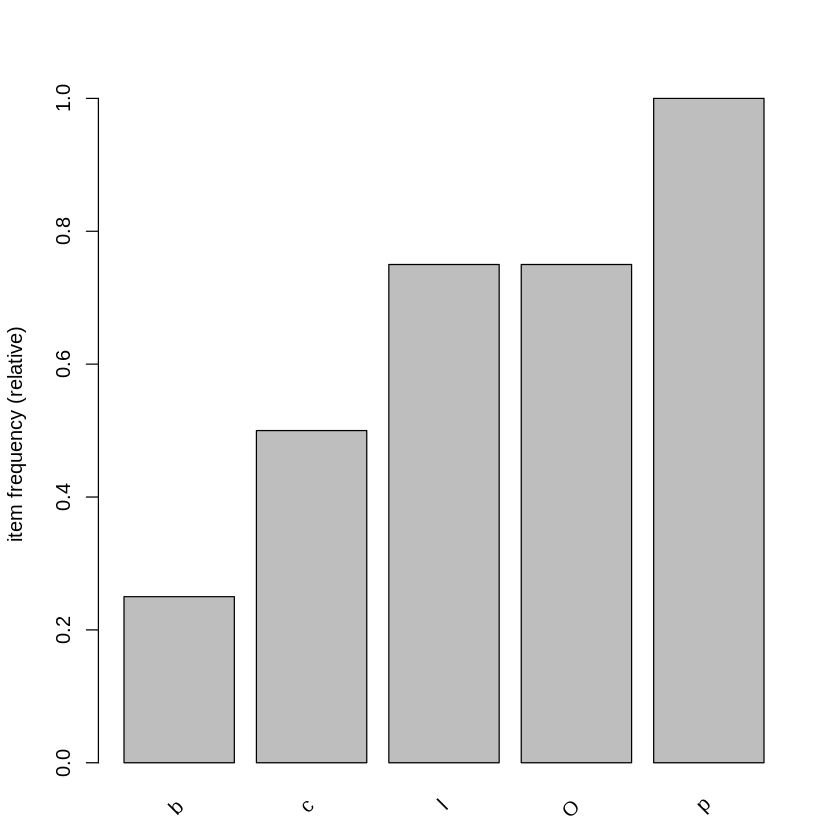

In [3]:
itemFrequency(transactions, type="absolute")
itemFrequency(transactions, type="relative")
itemFrequencyPlot(transactions)

Una vez definida la tabla de transacciones, buscaremos los itemsets más frecuentes a través de los dos algoritmos explicados, APRIORI:

# Aprendiendo de los datos: Algoritmo A Priori

Las reglas de asociación son implicaciones de la forma `X=>Y`. Dado un soporte mínimo `sopmin`, el algoritmo "a priori" es como sigue (consideramos *frecuente* un itemset si su soporte es mayor que `sopmin`:


 1) Generar itemsets de tamaño 1 frecuentes
 
 2) k <- 2. **Mientras** no haya nuevos itemsets frecuentes:
 
 * Generar itemsets de tamaño k a partir de los itemsets frecuentes de tamaño k-1.
 * Eliminar itemsets de tamaño k que contienen itemsets de tamaño k-1 no frecuentes
 * Calcular soporte de cada itemset de tamaño k
 * Eliminar itemsets de tamaño k no frecuentes.
 * k <- k+1
 
Está implementado en la librería `arules` por lo que, a través de la ayuda, podemos ver como usarlo y hacer un ejemplo:

In [4]:
?arules::apriori

In [5]:
?APparameter

In [6]:
iApriori <- apriori(transactions, 
                    parameter = list(supp=0, conf=0, target = "frequent itemsets"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5       0      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [30 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Inspect permite ver los itemsets:

In [7]:
iApriori
inspect(iApriori)

set of 30 itemsets 

     items     support count
[1]  {b}       0.25    1    
[2]  {c}       0.50    2    
[3]  {l}       0.75    3    
[4]  {O}       0.75    3    
[5]  {p}       1.00    4    
[6]  {b,c}     0.00    0    
[7]  {b,l}     0.25    1    
[8]  {b,O}     0.25    1    
[9]  {b,p}     0.25    1    
[10] {c,l}     0.25    1    
[11] {c,O}     0.50    2    
[12] {c,p}     0.50    2    
[13] {l,O}     0.50    2    
[14] {l,p}     0.75    3    
[15] {O,p}     0.75    3    
[16] {b,c,l}   0.00    0    
[17] {b,c,O}   0.00    0    
[18] {b,c,p}   0.00    0    
[19] {b,l,O}   0.25    1    
[20] {b,l,p}   0.25    1    
[21] {b,O,p}   0.25    1    
[22] {c,l,O}   0.25    1    
[23] {c,l,p}   0.25    1    
[24] {c,O,p}   0.50    2    
[25] {l,O,p}   0.50    2    
[26] {b,c,l,O} 0.00    0    
[27] {b,c,l,p} 0.00    0    
[28] {b,c,O,p} 0.00    0    
[29] {b,l,O,p} 0.25    1    
[30] {c,l,O,p} 0.25    1    


In [8]:
class(iApriori)

[1] "itemsets"
attr(,"package")
[1] "arules"

Podemos convertir este objeto a otros manejable en R:

In [9]:
iApriori.list <- as(items(iApriori), "list")
iApriori.matrix <- as(items(iApriori), "matrix")
iApriori.matrix

b,c,l,O,p
TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,TRUE,FALSE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,TRUE,TRUE,FALSE,FALSE


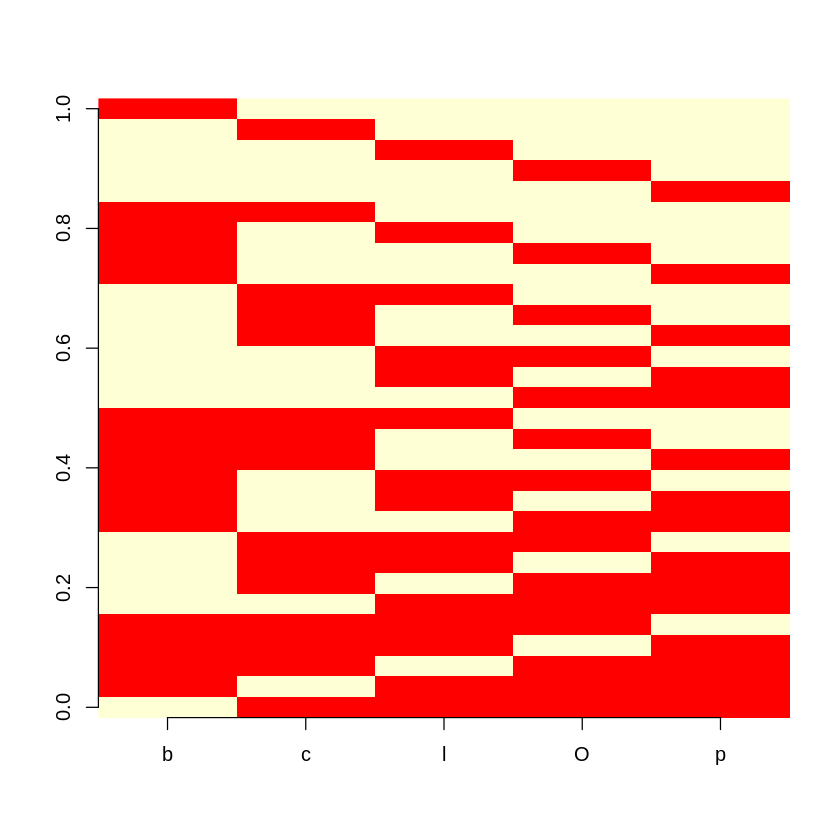

In [10]:
image(t(iApriori.matrix), axes = F)
axis(2)
axis(1, at=seq(0,1,length.out = 5), labels=colnames(iApriori.matrix))

Equivalentemente...

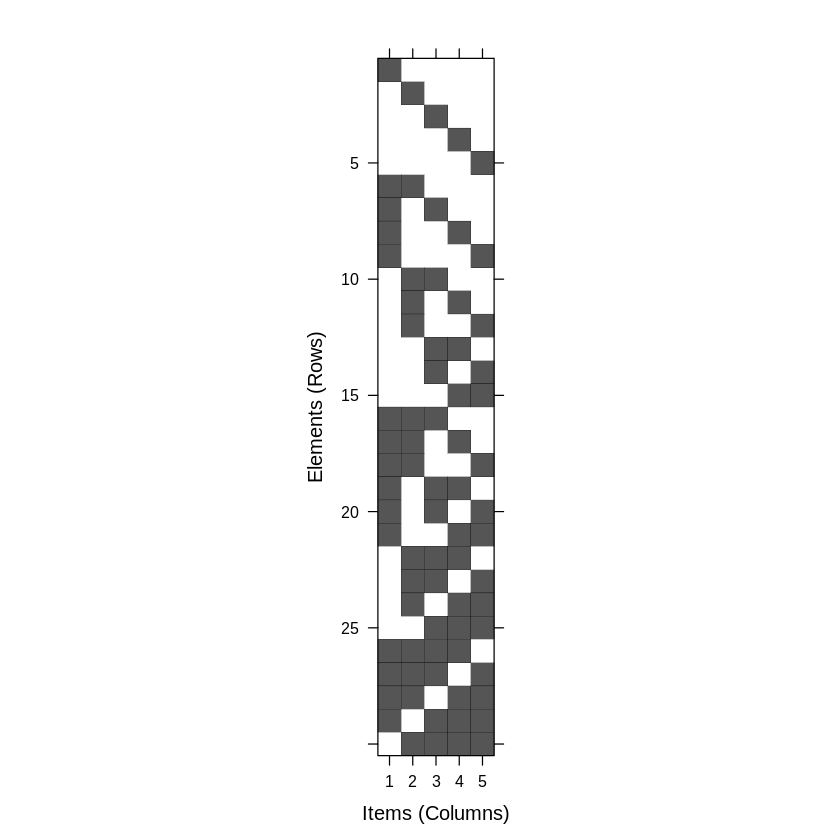

In [11]:
image(items(iApriori))

Utilizamos ahora el algoritmo ECLAT:

In [16]:
iEclat <- eclat(transactions, parameter = list(support = 0, maxlen = 5))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE       0      1      5 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 0 



Warning message in eclat(transactions, parameter = list(support = 0, maxlen = 5)):
“You chose a very low absolute support count of 0. You might run out of memory! Increase minimum support.
”


create itemset ... 
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating bit matrix ... [5 row(s), 4 column(s)] done [0.00s].
writing  ... [23 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [17]:
inspect(iEclat)

     items     support count
[1]  {b,l,O,p} 0.25    1    
[2]  {b,l,p}   0.25    1    
[3]  {b,l,O}   0.25    1    
[4]  {b,O,p}   0.25    1    
[5]  {b,p}     0.25    1    
[6]  {b,O}     0.25    1    
[7]  {b,l}     0.25    1    
[8]  {c,l,O,p} 0.25    1    
[9]  {c,l,p}   0.25    1    
[10] {c,l,O}   0.25    1    
[11] {c,O,p}   0.50    2    
[12] {c,p}     0.50    2    
[13] {c,O}     0.50    2    
[14] {c,l}     0.25    1    
[15] {l,O,p}   0.50    2    
[16] {l,p}     0.75    3    
[17] {l,O}     0.50    2    
[18] {O,p}     0.75    3    
[19] {p}       1.00    4    
[20] {O}       0.75    3    
[21] {l}       0.75    3    
[22] {c}       0.50    2    
[23] {b}       0.25    1    


In [18]:
summary(iEclat)

set of 23 itemsets

most frequent items:
      l       O       p       b       c (Other) 
     12      12      12       8       8       0 

element (itemset/transaction) length distribution:sizes
1 2 3 4 
5 9 7 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.261   3.000   4.000 

summary of quality measures:
    support           count      
 Min.   :0.2500   Min.   :1.000  
 1st Qu.:0.2500   1st Qu.:1.000  
 Median :0.2500   Median :1.000  
 Mean   :0.4348   Mean   :1.739  
 3rd Qu.:0.5000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :4.000  

includes transaction ID lists: FALSE 

mining info:
         data ntransactions support
 transactions             4       0

Notar que ECLAT suprime aquellos itemsets que no ocurren mientras que, si no se establecen restricciones, APRIORI devuelve todas las combinaciones, salvo el conjunto vacío y el total. Podemos filtrar las transacciones según incluyan ciertos productos con la función subset. La sintaxis `%in%`, `%ain%` y `%pin%`, define que incluyan alguno, todos o parte de los items incluidos en la lista.

In [19]:
inspect(subset(iApriori, subset = items %in% c("b","l") ) )

     items     support count
[1]  {b}       0.25    1    
[2]  {l}       0.75    3    
[3]  {b,c}     0.00    0    
[4]  {b,l}     0.25    1    
[5]  {b,O}     0.25    1    
[6]  {b,p}     0.25    1    
[7]  {c,l}     0.25    1    
[8]  {l,O}     0.50    2    
[9]  {l,p}     0.75    3    
[10] {b,c,l}   0.00    0    
[11] {b,c,O}   0.00    0    
[12] {b,c,p}   0.00    0    
[13] {b,l,O}   0.25    1    
[14] {b,l,p}   0.25    1    
[15] {b,O,p}   0.25    1    
[16] {c,l,O}   0.25    1    
[17] {c,l,p}   0.25    1    
[18] {l,O,p}   0.50    2    
[19] {b,c,l,O} 0.00    0    
[20] {b,c,l,p} 0.00    0    
[21] {b,c,O,p} 0.00    0    
[22] {b,l,O,p} 0.25    1    
[23] {c,l,O,p} 0.25    1    


In [20]:
inspect(subset(iApriori, subset = items %ain% c("b","l")))

    items     support count
[1] {b,l}     0.25    1    
[2] {b,c,l}   0.00    0    
[3] {b,l,O}   0.25    1    
[4] {b,l,p}   0.25    1    
[5] {b,c,l,O} 0.00    0    
[6] {b,c,l,p} 0.00    0    
[7] {b,l,O,p} 0.25    1    


In [21]:
inspect(subset(iApriori, subset = items %pin% c("b","l")))

Warning message in items %pin% c("b", "l"):
“table contains more than one item label pattern and only the first element will be used”


     items     support count
[1]  {b}       0.25    1    
[2]  {b,c}     0.00    0    
[3]  {b,l}     0.25    1    
[4]  {b,O}     0.25    1    
[5]  {b,p}     0.25    1    
[6]  {b,c,l}   0.00    0    
[7]  {b,c,O}   0.00    0    
[8]  {b,c,p}   0.00    0    
[9]  {b,l,O}   0.25    1    
[10] {b,l,p}   0.25    1    
[11] {b,O,p}   0.25    1    
[12] {b,c,l,O} 0.00    0    
[13] {b,c,l,p} 0.00    0    
[14] {b,c,O,p} 0.00    0    
[15] {b,l,O,p} 0.25    1    


In [22]:
transactions

transactions in sparse format with
 4 transactions (rows) and
 5 items (columns)

Notar que en el último caso, el orden de los items es relevante.

Como hemos visto, una vez obtenidos los itemsets a partir de ellos construimos las reglas de asociación en base a las restricciones que definamos. En el caso del algoritmo APRIORI la función permite obtener las reglas como salida. Sin embargo, el algoritmo ECLAT únicamente devuelve los itemsets y las reglas de asociación deben inducirse con la función `ruleInduction`.

In [23]:
inspect(transactions)

    items    
[1] {b,l,O,p}
[2] {l,p}    
[3] {c,O,p}  
[4] {c,l,O,p}


In [24]:
rApriori <- apriori(transactions, parameter = list(supp=0, conf=0, target = "rules"))
inspect(rApriori)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [75 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs        rhs support confidence lift      count
[1]  {}      => {b} 0.25    0.2500000  1.0000000 1    
[2]  {}      => {c} 0.50    0.5000000  1.0000000 2    
[3]  {}      => {l} 0.75    0.7500000  1.0000000 3    
[4]  {}      => {O} 0.75    0.7500000  1.0000000 3    
[5]  {}      => {

La inclusión de reglas cuyo antecedente (`lhs`: left hand side) es el conjunto vacío (`{}`) pueden fitrarse incluyendo restricciones respecto a la longitud mínima (`minlen`).

In [25]:
rApriori <- apriori(transactions, parameter = list(supp=0, conf=0, target = "rules", minlen=2))
inspect(rApriori)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs        rhs support confidence lift      count
[1]  {b}     => {c} 0.00    0.0000000  0.0000000 0    
[2]  {c}     => {b} 0.00    0.0000000  0.0000000 0    
[3]  {b}     => {l} 0.25    1.0000000  1.3333333 1    
[4]  {l}     => {b} 0.25    0.3333333  1.3333333 1    
[5]  {b}     => {

En el caso de ECLAT, como vimos, hay que hacer uso de funciones específicas de obtención de reglas:

In [26]:
?ruleInduction

In [28]:
rEclat <- ruleInduction(iEclat, transactions, confidence = 0)
inspect(rEclat)

     lhs        rhs support confidence lift      itemset
[1]  {l,O,p} => {b} 0.25    0.5000000  2.0000000  1     
[2]  {b,O,p} => {l} 0.25    1.0000000  1.3333333  1     
[3]  {b,l,p} => {O} 0.25    1.0000000  1.3333333  1     
[4]  {b,l,O} => {p} 0.25    1.0000000  1.0000000  1     
[5]  {l,p}   => {b} 0.25    0.3333333  1.3333333  2     
[6]  {b,p}   => {l} 0.25    1.0000000  1.3333333  2     
[7]  {b,l}   => {p} 0.25    1.0000000  1.0000000  2     
[8]  {l,O}   => {b} 0.25    0.5000000  2.0000000  3     
[9]  {b,O}   => {l} 0.25    1.0000000  1.3333333  3     
[10] {b,l}   => {O} 0.25    1.0000000  1.3333333  3     
[11] {O,p}   => {b} 0.25    0.3333333  1.3333333  4     
[12] {b,p}   => {O} 0.25    1.0000000  1.3333333  4     
[13] {b,O}   => {p} 0.25    1.0000000  1.0000000  4     
[14] {p}     => {b} 0.25    0.2500000  1.0000000  5     
[15] {b}     => {p} 0.25    1.0000000  1.0000000  5     
[16] {O}     => {b} 0.25    0.3333333  1.3333333  6     
[17] {b}     => {O} 0.25    1.0

Si bien no hemos realizado ningún filtro a las reglas obtenidas, más allá de las impuestas por los algoritmos de aprendizaje, es habitual obtener reglas redundantes la cuales debemos filtrar. Para ello, la función `is.redundant` nos permite localizar estas redundancias:

In [30]:
indRedundantApriori <- which(is.redundant(rApriori))
inspect(rApriori[indRedundantApriori])

     lhs        rhs support confidence lift      count
[1]  {b,c}   => {l} 0.00    1.0000000  1.3333333 0    
[2]  {b,l}   => {c} 0.00    0.0000000  0.0000000 0    
[3]  {c,l}   => {b} 0.00    0.0000000  0.0000000 0    
[4]  {b,c}   => {O} 0.00    1.0000000  1.3333333 0    
[5]  {b,O}   => {c} 0.00    0.0000000  0.0000000 0    
[6]  {c,O}   => {b} 0.00    0.0000000  0.0000000 0    
[7]  {b,c}   => {p} 0.00    1.0000000  1.0000000 0    
[8]  {b,p}   => {c} 0.00    0.0000000  0.0000000 0    
[9]  {c,p}   => {b} 0.00    0.0000000  0.0000000 0    
[10] {b,l}   => {O} 0.25    1.0000000  1.3333333 1    
[11] {b,O}   => {l} 0.25    1.0000000  1.3333333 1    
[12] {b,l}   => {p} 0.25    1.0000000  1.0000000 1    
[13] {b,p}   => {l} 0.25    1.0000000  1.3333333 1    
[14] {l,p}   => {b} 0.25    0.3333333  1.3333333 1    
[15] {b,O}   => {p} 0.25    1.0000000  1.0000000 1    
[16] {b,p}   => {O} 0.25    1.0000000  1.3333333 1    
[17] {O,p}   => {b} 0.25    0.3333333  1.3333333 1    
[18] {c,l}

Procedemos a filtrar dichas redes:

In [31]:
rAprioriFiltered <- rApriori[!is.redundant(rApriori)]
rEclatFiltered <- rEclat[!is.redundant(rEclat)]

e inspeccionamos de nuevo las reglas obtenidas con el algoritmo APRIORI

In [32]:
inspect(rAprioriFiltered)

     lhs      rhs support confidence lift      count
[1]  {b}   => {c} 0.00    0.0000000  0.0000000 0    
[2]  {c}   => {b} 0.00    0.0000000  0.0000000 0    
[3]  {b}   => {l} 0.25    1.0000000  1.3333333 1    
[4]  {l}   => {b} 0.25    0.3333333  1.3333333 1    
[5]  {b}   => {O} 0.25    1.0000000  1.3333333 1    
[6]  {O}   => {b} 0.25    0.3333333  1.3333333 1    
[7]  {b}   => {p} 0.25    1.0000000  1.0000000 1    
[8]  {p}   => {b} 0.25    0.2500000  1.0000000 1    
[9]  {c}   => {l} 0.25    0.5000000  0.6666667 1    
[10] {l}   => {c} 0.25    0.3333333  0.6666667 1    
[11] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[12] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[13] {c}   => {p} 0.50    1.0000000  1.0000000 2    
[14] {p}   => {c} 0.50    0.5000000  1.0000000 2    
[15] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[16] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[17] {l}   => {p} 0.75    1.0000000  1.0000000 3    
[18] {p}   => {l} 0.75    0.7500000  1.0000000

y con el algoritmo ECLAT

In [64]:
inspect(rEclatFiltered)

     lhs      rhs support confidence lift      itemset
[1]  {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2]  {p}   => {b} 0.25    0.2500000  1.0000000  5     
[3]  {b}   => {p} 0.25    1.0000000  1.0000000  5     
[4]  {O}   => {b} 0.25    0.3333333  1.3333333  6     
[5]  {b}   => {O} 0.25    1.0000000  1.3333333  6     
[6]  {l}   => {b} 0.25    0.3333333  1.3333333  7     
[7]  {b}   => {l} 0.25    1.0000000  1.3333333  7     
[8]  {p}   => {c} 0.50    0.5000000  1.0000000 12     
[9]  {c}   => {p} 0.50    1.0000000  1.0000000 12     
[10] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[11] {c}   => {O} 0.50    1.0000000  1.3333333 13     
[12] {l}   => {c} 0.25    0.3333333  0.6666667 14     
[13] {c}   => {l} 0.25    0.5000000  0.6666667 14     
[14] {p}   => {l} 0.75    0.7500000  1.0000000 16     
[15] {l}   => {p} 0.75    1.0000000  1.0000000 16     
[16] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[17] {l}   => {O} 0.50    0.6666667  0.8888889 17     
[18] {p}  

Finalmente, podemos resolver dudas como las siguientes: 
* Encontrar todas las reglas relacionando cualquier producto con uno dado (p.e. O - Naranja).

In [34]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O")))
inspect(subset(rEclatFiltered, subset = rhs %in% c("O")))

    lhs    rhs support confidence lift      count
[1] {b} => {O} 0.25    1.0000000  1.3333333 1    
[2] {c} => {O} 0.50    1.0000000  1.3333333 2    
[3] {l} => {O} 0.50    0.6666667  0.8888889 2    
[4] {p} => {O} 0.75    0.7500000  1.0000000 3    
    lhs    rhs support confidence lift      itemset
[1] {b} => {O} 0.25    1.0000000  1.3333333  6     
[2] {c} => {O} 0.50    1.0000000  1.3333333 13     
[3] {l} => {O} 0.50    0.6666667  0.8888889 17     
[4] {p} => {O} 0.75    0.7500000  1.0000000 18     


* Encontrar todas las reglas que dependen de un producto dado (p.e. O - Naranja).

In [35]:
inspect(subset(rAprioriFiltered, subset = lhs %in% c("O")))
inspect(subset(rEclatFiltered, subset = lhs %in% c("O")))

    lhs      rhs support confidence lift      count
[1] {O}   => {b} 0.25    0.3333333  1.3333333 1    
[2] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[3] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[4] {O}   => {p} 0.75    1.0000000  1.0000000 3    
[5] {l,O} => {b} 0.25    0.5000000  2.0000000 1    
    lhs      rhs support confidence lift      itemset
[1] {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2] {O}   => {b} 0.25    0.3333333  1.3333333  6     
[3] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[4] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[5] {O}   => {p} 0.75    1.0000000  1.0000000 18     


* Encontrar todas las reglas que cumplan los dos criterios anteriores para ciertos productos dados.

In [36]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O") | lhs %in% c("O")))
inspect(subset(rEclatFiltered, subset = rhs %in% c("O") | lhs %in% c("O")))

    lhs      rhs support confidence lift      count
[1] {b}   => {O} 0.25    1.0000000  1.3333333 1    
[2] {O}   => {b} 0.25    0.3333333  1.3333333 1    
[3] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[4] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[5] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[6] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[7] {O}   => {p} 0.75    1.0000000  1.0000000 3    
[8] {p}   => {O} 0.75    0.7500000  1.0000000 3    
[9] {l,O} => {b} 0.25    0.5000000  2.0000000 1    
    lhs      rhs support confidence lift      itemset
[1] {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2] {O}   => {b} 0.25    0.3333333  1.3333333  6     
[3] {b}   => {O} 0.25    1.0000000  1.3333333  6     
[4] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[5] {c}   => {O} 0.50    1.0000000  1.3333333 13     
[6] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[7] {l}   => {O} 0.50    0.6666667  0.8888889 17     
[8] {p}   => {O} 0.75    0.7500000  1.0000000 18

* Encontrar el conjunto de reglas con mayor confianza cumpliendo alguno de los criterios anteriores.

In [41]:
inspect(subset(rAprioriFiltered, subset = rhs %in% c("O") | lhs %in% c("O") & confidence >= 0.5))
inspect(subset(rEclatFiltered, subset = rhs %in% c("O") | lhs %in% c("O") & confidence >= 0.5))

    lhs      rhs support confidence lift      count
[1] {b}   => {O} 0.25    1.0000000  1.3333333 1    
[2] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[3] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[4] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[5] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[6] {O}   => {p} 0.75    1.0000000  1.0000000 3    
[7] {p}   => {O} 0.75    0.7500000  1.0000000 3    
[8] {l,O} => {b} 0.25    0.5000000  2.0000000 1    
    lhs      rhs support confidence lift      itemset
[1] {l,O} => {b} 0.25    0.5000000  2.0000000  3     
[2] {b}   => {O} 0.25    1.0000000  1.3333333  6     
[3] {O}   => {c} 0.50    0.6666667  1.3333333 13     
[4] {c}   => {O} 0.50    1.0000000  1.3333333 13     
[5] {O}   => {l} 0.50    0.6666667  0.8888889 17     
[6] {l}   => {O} 0.50    0.6666667  0.8888889 17     
[7] {p}   => {O} 0.75    0.7500000  1.0000000 18     
[8] {O}   => {p} 0.75    1.0000000  1.0000000 18     


* Consultar el conjunto de reglas con alguno de los parámetros con valores más altos (`head`) o bajos (`tail`)

In [42]:
inspect(head(sort(rAprioriFiltered, by ="lift"),3))
inspect(head(sort(rEclatFiltered, by ="lift"),3))
inspect(tail(sort(rAprioriFiltered, by ="lift"),3))
inspect(tail(sort(rEclatFiltered, by ="lift"),3))

    lhs      rhs support confidence lift     count
[1] {l,O} => {b} 0.25    0.5000000  2.000000 1    
[2] {b}   => {l} 0.25    1.0000000  1.333333 1    
[3] {l}   => {b} 0.25    0.3333333  1.333333 1    
    lhs      rhs support confidence lift     itemset
[1] {l,O} => {b} 0.25    0.5000000  2.000000 3      
[2] {O}   => {b} 0.25    0.3333333  1.333333 6      
[3] {b}   => {O} 0.25    1.0000000  1.333333 6      
    lhs    rhs support confidence lift      count
[1] {l} => {c} 0.25    0.3333333  0.6666667 1    
[2] {b} => {c} 0.00    0.0000000  0.0000000 0    
[3] {c} => {b} 0.00    0.0000000  0.0000000 0    
    lhs    rhs support confidence lift      itemset
[1] {l} => {O} 0.50    0.6666667  0.8888889 17     
[2] {l} => {c} 0.25    0.3333333  0.6666667 14     
[3] {c} => {l} 0.25    0.5000000  0.6666667 14     


Finalmente, una vez obtenidas las reglas de asociación, podemos visualizar los resultados:
- Matriz de itemsets:

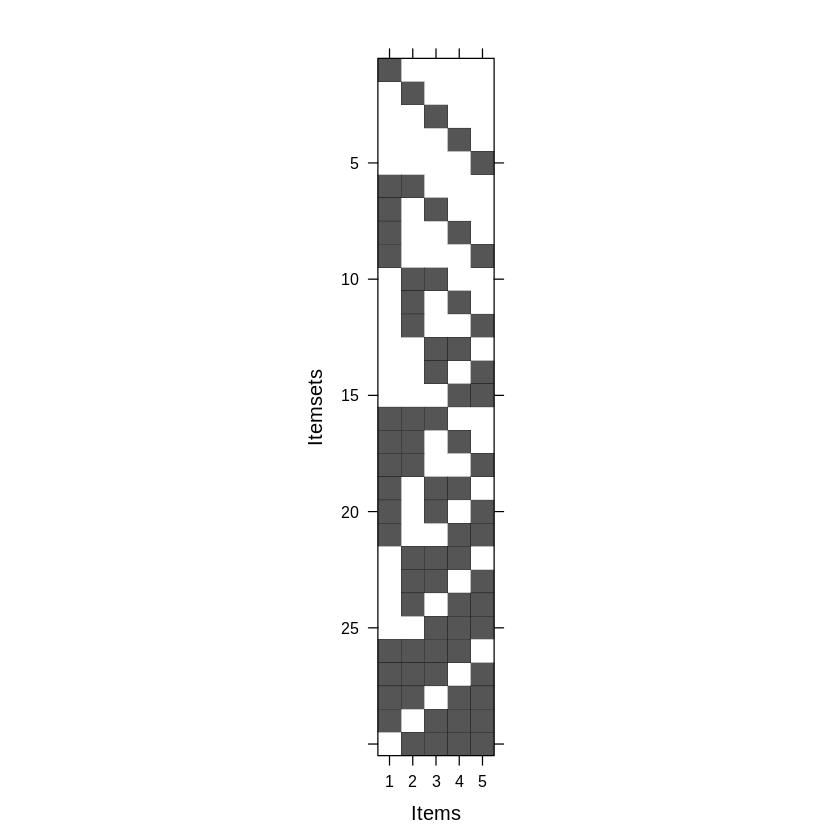

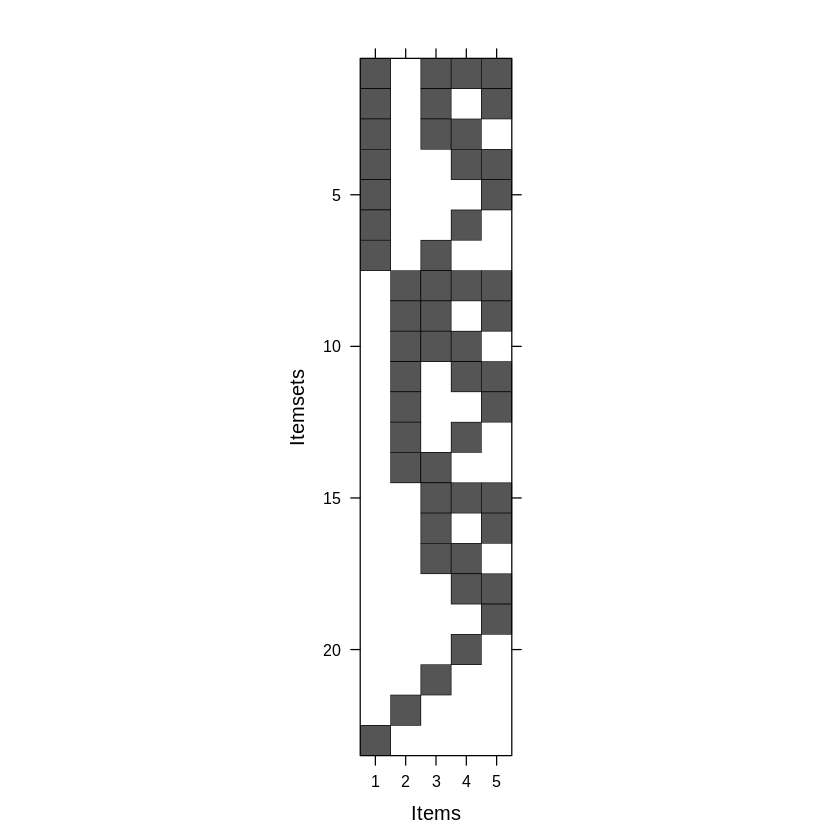

In [43]:
image(iApriori@items, xlab = "Items", ylab = "Itemsets")
image(iEclat@items, xlab = "Items", ylab = "Itemsets")

- Scatter-plot de reglas:

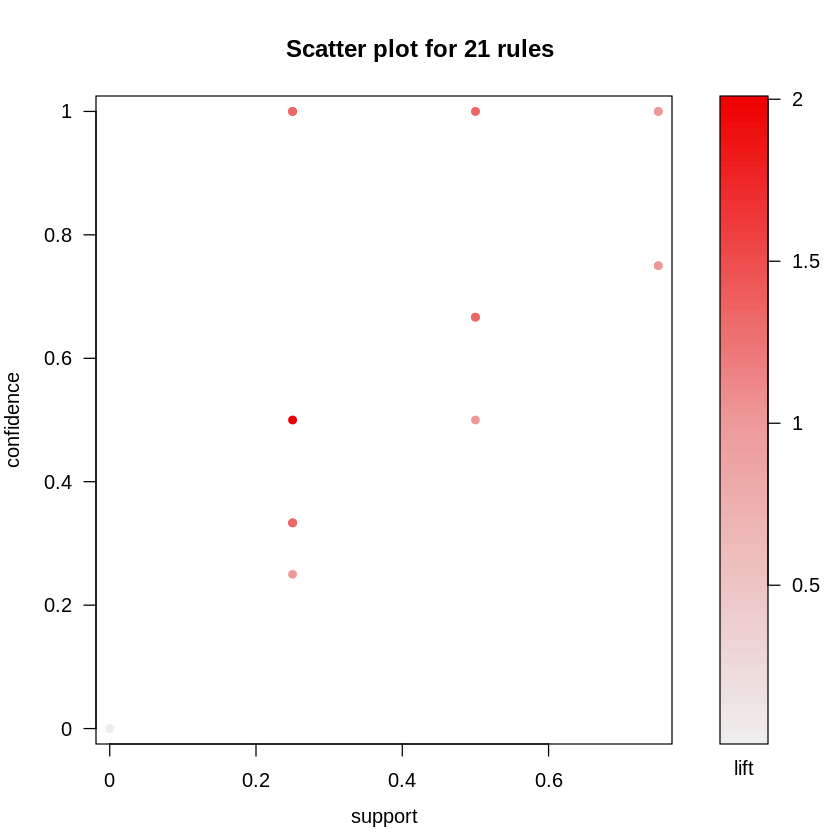

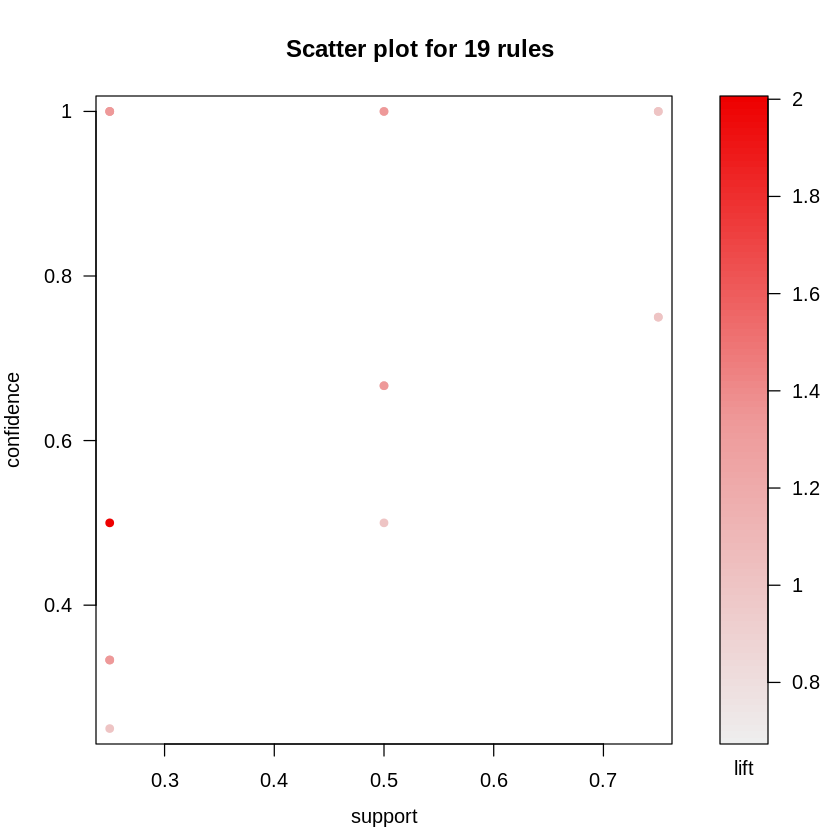

In [63]:
plot(rAprioriFiltered, jitter = 0)
plot(rEclatFiltered, jitter = 0)

- Matriz de asociaciones:

In [66]:
inspect(rAprioriFiltered)

     lhs      rhs support confidence lift      count
[1]  {b}   => {c} 0.00    0.0000000  0.0000000 0    
[2]  {c}   => {b} 0.00    0.0000000  0.0000000 0    
[3]  {b}   => {l} 0.25    1.0000000  1.3333333 1    
[4]  {l}   => {b} 0.25    0.3333333  1.3333333 1    
[5]  {b}   => {O} 0.25    1.0000000  1.3333333 1    
[6]  {O}   => {b} 0.25    0.3333333  1.3333333 1    
[7]  {b}   => {p} 0.25    1.0000000  1.0000000 1    
[8]  {p}   => {b} 0.25    0.2500000  1.0000000 1    
[9]  {c}   => {l} 0.25    0.5000000  0.6666667 1    
[10] {l}   => {c} 0.25    0.3333333  0.6666667 1    
[11] {c}   => {O} 0.50    1.0000000  1.3333333 2    
[12] {O}   => {c} 0.50    0.6666667  1.3333333 2    
[13] {c}   => {p} 0.50    1.0000000  1.0000000 2    
[14] {p}   => {c} 0.50    0.5000000  1.0000000 2    
[15] {l}   => {O} 0.50    0.6666667  0.8888889 2    
[16] {O}   => {l} 0.50    0.6666667  0.8888889 2    
[17] {l}   => {p} 0.75    1.0000000  1.0000000 3    
[18] {p}   => {l} 0.75    0.7500000  1.0000000

Itemsets in Antecedent (LHS)
[1] "{l,O}" "{O}"   "{p}"   "{l}"   "{b}"   "{c}"  
Itemsets in Consequent (RHS)
[1] "{c}" "{l}" "{p}" "{b}" "{O}"


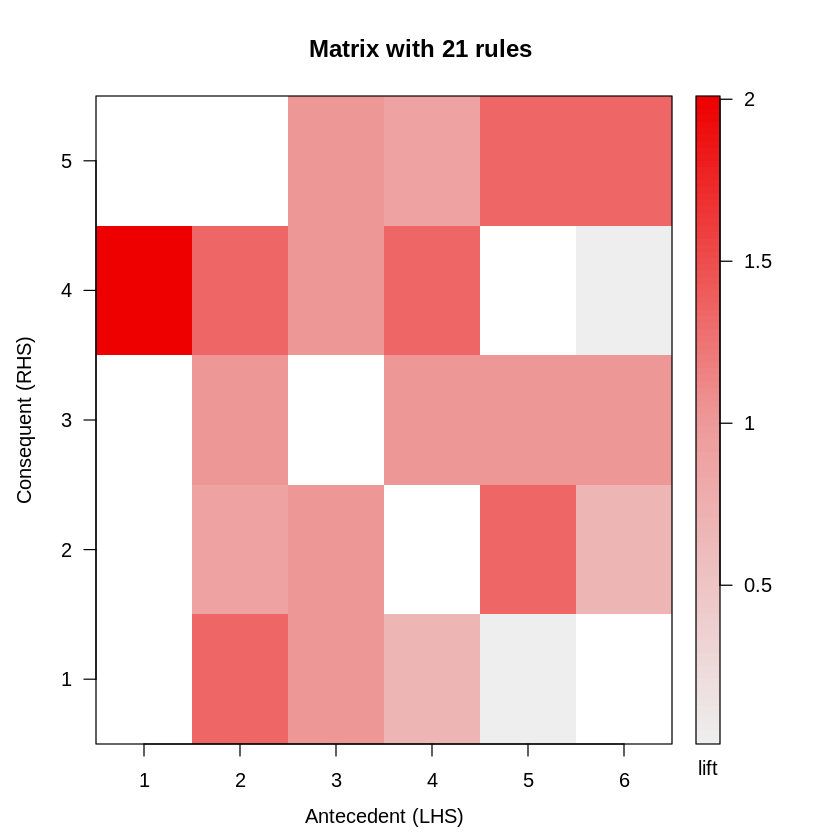

In [65]:
plot(rAprioriFiltered, method="matrix", measure="lift")

- Enlaces de las reglas:

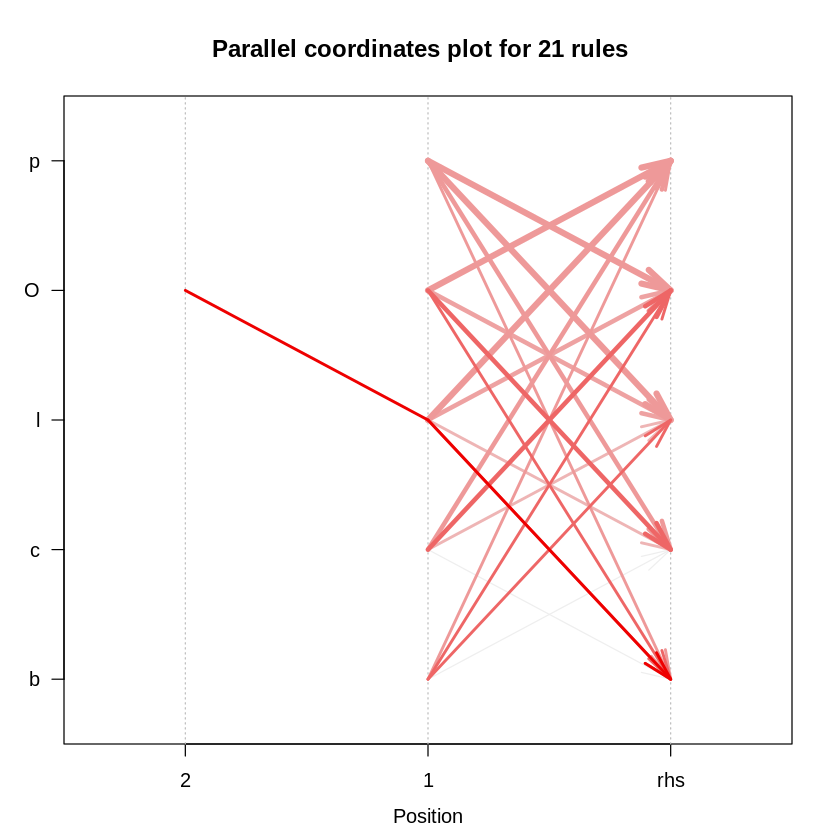

In [70]:
plot(rAprioriFiltered, method="paracoord")

## Base de datos Groceries

En la presente tarea trabajaremos con la base de datos `Groceries`, disponibles públicamente para su uso desde R. Para una breve descripción de esta base de datos puede recurrir a la ayuda de R.

In [49]:
?Groceries
# Loading the dataset
data(Groceries)
Groceries@itemInfo$labels

[1] "frankfurter"               "sausage"                  
  [3] "liver loaf"                "ham"                      
  [5] "meat"                      "finished products"        
  [7] "organic sausage"           "chicken"                  
  [9] "turkey"                    "pork"                     
 [11] "beef"                      "hamburger meat"           
 [13] "fish"                      "citrus fruit"             
 [15] "tropical fruit"            "pip fruit"                
 [17] "grapes"                    "berries"                  
 [19] "nuts/prunes"               "root vegetables"          
 [21] "onions"                    "herbs"                    
 [23] "other vegetables"          "packaged fruit/vegetables"
 [25] "whole milk"                "butter"                   
 [27] "curd"                      "dessert"                  
 [29] "butter milk"               "yogurt"                   
 [31] "whipped/sour cream"        "beverages"                
 [33] "UHT-milk"                  "condensed milk"           
 [35] "cream"                     "soft cheese"              
 [37] "sliced cheese"             "hard cheese"              
 [39] "cream cheese "             "processed cheese"         
 [41] "spread cheese"             "curd cheese"              
 [43] "specialty cheese"          "mayonnaise"               
 [45] "salad dressing"            "tidbits"                  
 [47] "frozen vegetables"         "frozen fruits"            
 [49] "frozen meals"              "frozen fish"              
 [51] "frozen chicken"            "ice cream"                
 [53] "frozen dessert"            "frozen potato products"   
 [55] "domestic eggs"             "rolls/buns"               
 [57] "white bread"               "brown bread"              
 [59] "pastry"                    "roll products "           
 [61] "semi-finished bread"       "zwieback"                 
 [63] "potato products"           "flour"                    
 [65] "salt"                      "rice"                     
 [67] "pasta"                     "vinegar"                  
 [69] "oil"                       "margarine"                
 [71] "specialty fat"             "sugar"                    
 [73] "artif. sweetener"          "honey"                    
 [75] "mustard"                   "ketchup"                  
 [77] "spices"                    "soups"                    
 [79] "ready soups"               "Instant food products"    
 [81] "sauces"                    "cereals"                  
 [83] "organic products"          "baking powder"            
 [85] "preservation products"     "pudding powder"           
 [87] "canned vegetables"         "canned fruit"             
 [89] "pickled vegetables"        "specialty vegetables"     
 [91] "jam"                       "sweet spreads"            
 [93] "meat spreads"              "canned fish"              
 [95] "dog food"                  "cat food"                 
 [97] "pet care"                  "baby food"                
 [99] "coffee"                    "instant coffee"           
[101] "tea"                       "cocoa drinks"             
[103] "bottled water"             "soda"                     
[105] "misc. beverages"           "fruit/vegetable juice"    
[107] "syrup"                     "bottled beer"             
[109] "canned beer"               "brandy"                   
[111] "whisky"                    "liquor"                   
[113] "rum"                       "liqueur"                  
[115] "liquor (appetizer)"        "white wine"               
[117] "red/blush wine"            "prosecco"                 
[119] "sparkling wine"            "salty snack"              
[121] "popcorn"                   "nut snack"                
[123] "snack products"            "long life bakery product" 
[125] "waffles"                   "cake bar"                 
[127] "chewing gum"               "chocolate"                
[129] "cooking chocolate"         

¿Cuantas transacciones y clases contiene el dataset?

Notar que, para inspeccionar el objeto, hemos usado en un caso el símbolo arroba (`@`) y en otro el dolar (`$`). Esto se debe a que en el primer caso es un objeto tipo S3 ó S4, mientras que en el segundo caso es una colección de datos o `data.frame`.

Podemos inspeccionar el objeto y ver algunas de las reglas. Por ejemplo, el siguiente comando nos mostrará las primeras 4 reglas en función de su confianza:

Para ver cómo funcionan los comandos anteriores puedes usar la ayuda de R:
`? sort`
`? inspect`
`? head`

## Herramientas de visualización

En los puntos anteriores hemos establecido las reglas de asociación y manejado la estructura obtenida. Sin embargo, la librería `aruleViz` incluye herramientas de visualización a través de la sobrecarga de la función `plot` (`? plot`).

In [ ]:
plot(rules, method = NULL, measure = "support", shading = "lift", interactive = FALSE, data = NULL, control = NULL)

## Práctica:

Responde a las siguientes cuestiones, incluyendo cuando corresponda el código asociado:

In [ ]:
rules <- apriori(Groceries, parameter=list(support = 0.001, confidence = 0.5))

In [ ]:
inspect(head(sort(rules, by = "confidence"),4))

 * ¿Cuantas reglas de asociación se han generado? 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Qué porcentaje de reglas es redundante? 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Teniendo en cuenta el conjunto de datos de partida, ¿resulta útil el conjunto de reglas generado?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Cual es la regla con mayor confianza? ¿Y con menor?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Cual es la regla con mayor interés? ¿Y con menor?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * En el objeto aparece una medida llamada `lift`, ¿qué mide?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Escribe el `podium` asociado a cada una de las tres medidas: `support`, `confidence` y `lift`.

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Se puede inferir que la regla es persistente respecto a la medida de interés?

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Explorar los ejemplos de la función plot. 

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * ¿Hay alguna agrupación de items que se de con gran frecuencia? Por ejemplo, ¿los productos de limpieza se compran de forma conjunta? ¿Los productos de cuidado personal?, etc...

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 * Responder a las preguntas anteriores con los diferentes algoritmos disponibles, comparar los resultados y concluir si los resultados son o no robustos respecto al algoritmo.

In [ ]:
# Incluye el código para responder a la cuestion anterior.

 
## Session Info:

In [ ]:
print(sessionInfo())